In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input,GlobalMaxPool1D,Dense
from tensorflow.keras.models import Model

In [3]:
df = pd.read_csv('/content/spam.csv',encoding='ISO-8859-1')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.isna().sum() / len(df)

v1            0.000000
v2            0.000000
Unnamed: 2    0.991027
Unnamed: 3    0.997846
Unnamed: 4    0.998923
dtype: float64

In [6]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [7]:
df.columns = ['label','data']

In [8]:
df.head()

,label,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

In [11]:
df.head()

,label,data
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
X = df['data']
Y = df['label']

In [13]:
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.33)

In [26]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_vocab_size = 2000
tokenizer = Tokenizer(num_words=max_vocab_size)
tokenizer.fit_on_texts(X_train)

# Convert texts to sequences
sequence_train = tokenizer.texts_to_sequences(X_train)
sequence_test = tokenizer.texts_to_sequences(X_test)

# Pad sequences
data_train = pad_sequences(sequence_train)
print("Shape of train tensor: ", data_train.shape)
T = data_train.shape[1]
data_test = pad_sequences(sequence_test, maxlen=T)
print("Shape of test tensor: ", data_test.shape)

Shape of train tensor:  (3733, 174)
Shape of test tensor:  (1839, 174)


In [15]:
word2inx = tokenizer.word_index
V = len(word2inx)
print("Unique tokens : ",V)

Unique tokens :  7238


In [18]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, GlobalMaxPooling1D, Dense

In [19]:
D = 20 # Embedding dimensionality
M = 15 #hidden state dimensionality

In [27]:
i = Input(shape=(T,))
x = Embedding(input_dim=V+1, output_dim=D)(i)
x = LSTM(M, return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)

In [29]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [30]:
r = model.fit(data_train, y_train, epochs=10, validation_data=(data_test, y_test))

print(f"Training accuracy: {r.history['accuracy'][-1]}")
print(f"Validation accuracy: {r.history['val_accuracy'][-1]}")

Epoch 1/10
117/117 [==============================] - 14s 94ms/step - loss: 0.4740 - accuracy: 0.8548 - val_loss: 0.3674 - val_accuracy: 0.8662
Epoch 2/10
117/117 [==============================] - 11s 90ms/step - loss: 0.3051 - accuracy: 0.8658 - val_loss: 0.2489 - val_accuracy: 0.8662
Epoch 3/10
117/117 [==============================] - 9s 74ms/step - loss: 0.2055 - accuracy: 0.8950 - val_loss: 0.1669 - val_accuracy: 0.9598
Epoch 4/10
117/117 [==============================] - 10s 87ms/step - loss: 0.1238 - accuracy: 0.9791 - val_loss: 0.1090 - val_accuracy: 0.9772
Epoch 5/10
117/117 [==============================] - 11s 93ms/step - loss: 0.0752 - accuracy: 0.9874 - val_loss: 0.0823 - val_accuracy: 0.9837
Epoch 6/10
117/117 [==============================] - 8s 72ms/step - loss: 0.0509 - accuracy: 0.9901 - val_loss: 0.0710 - val_accuracy: 0.9864
Epoch 7/10
117/117 [==============================] - 11s 93ms/step - loss: 0.0383 - accuracy: 0.9946 - val_loss: 0.0680 - val_accuracy: 0

In [31]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 174)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 174, 20)           144780    
                                                                 
 lstm_1 (LSTM)               (None, 174, 15)           2160      
                                                                 
 global_max_pooling1d_1 (Gl  (None, 15)                0         
 obalMaxPooling1D)                                               
                                                                 
 dense_1 (Dense)             (None, 1)                 16        
                                                                 
Total params: 146956 (574.05 KB)
Trainable params: 146956 (574.05 KB)
Non-trainable params: 0 (0.00 Byte)
___________________

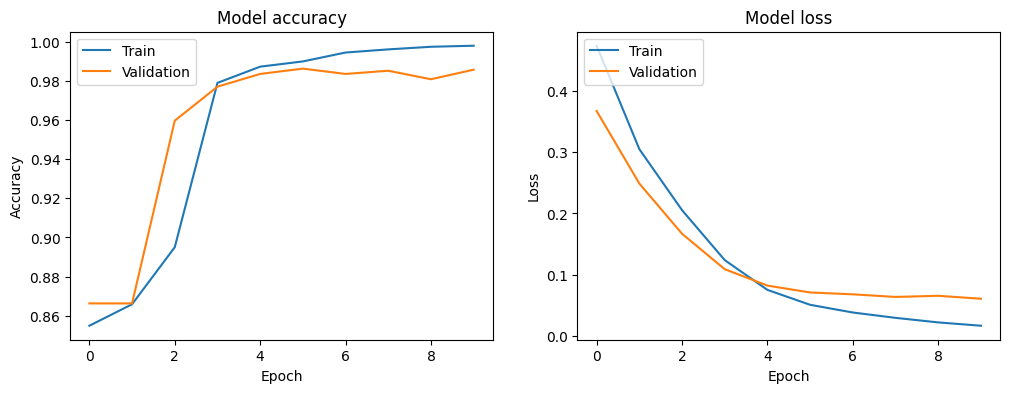

In [32]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [71]:
def preprocess_input(text, tokenizer, max_len):
    sequence = tokenizer.texts_to_sequences([text])
    padded_sequence = pad_sequences(sequence, maxlen=max_len)
    return padded_sequence

custom_text = "URGENT: Your Sem IV Results are Out NOW! Click HERE to Check!"
print(custom_text)
preprocessed_text = preprocess_input(custom_text, tokenizer, T)

prediction = model.predict(preprocessed_text)
print(f"Prediction: {prediction[0][0]}")

if prediction[0][0] > 0.5:
    print("The message is classified as spam.")
else:
    print("The message is classified as not spam.")

URGENT: Your Sem IV Results are Out NOW! Click HERE to Check!
1/1 [==============================] - 0s 86ms/step
Prediction: 0.9459675550460815
The message is classified as spam.
